# Setup


In [1]:
import os
import numpy as np
import pandas as pd
import networkx as nx
from scipy import sparse

import matplotlib.pyplot as plt
import matplotlib.colors as clr
# plt.style.use('science')
# plt.style.use(['science','notebook'])
# plt.style.use('seaborn-ticks')
# plt.rcParams['figure.dpi'] = 300
# plt.rcParams['savefig.dpi'] = 300
# import seaborn as sns
# sns.set_style('ticks')
# sns.set_context('notebook')
# sns.set(rc={'figure.dpi': 300, 'savefig.dpi': 300})

from utils import paths
from graph.utils import *

# from graph.data import *
# from graph.network import *
# from graph.temporal import *


%load_ext autoreload
%autoreload 2

# Data


Create spatial-temporal matrices and networks from database using codes in `graph.data` package

In [2]:
from graph.data import *

User-spatial-temporal matrix using all APs

In [ ]:
# Spatial-Temporal Matrix : User -> SSID x Hour
    phonelab_sp(
        folder_in=['/home/ali/Projects/Network/data/phonelab/db'],
        folder_out=['/home/ali/Projects/Network/data/phonelab/data/sp_selected_0'],
        # label_file_in='connect'
    )

## User-AP

Read from DB without any filtering

In [ ]:
db = os.path.join(paths.PHONELAB_DB, 'phonelab.db')

In [35]:
query = f'SELECT user,ssid,time FROM logs WHERE connect = 1 ORDER BY time,user,ssid;'
# query = f'SELECT user,bssid,time FROM logs WHERE connect = 1 ORDER BY time,user,bssid;'
# query = f'SELECT user,ssid,bssid,time FROM logs WHERE connect = 1 ORDER BY time,user,ssid,bssid;'
# query = f'SELECT user,ssid,time FROM logs WHERE connect = 0 ORDER BY time,user,ssid;'
# query = f'SELECT user,bssid,time FROM logs WHERE connect = 0 ORDER BY time,user,bssid;'
# query = f'SELECT user,ssid,bssid,time FROM logs WHERE connect = 0 ORDER BY time,user,ssid,bssid;'

Read from DB while filtering dates and connection type

In [30]:
# connect = 1
# t = datetime.fromisoformat('2014-11-07')
# query = f'SELECT user,ssid,bssid,time FROM logs WHERE connect = {connect} AND date = \'{t.date()}\' ORDER BY time,user,ssid,bssid;'

In [36]:
df = db_select_df(db, query)

In [32]:
df.head()

,user,ssid,time
0,246,131,2014-11-07 18:54:12
1,246,2,2014-11-07 19:00:45
2,246,2,2014-11-07 19:00:54
3,246,1060,2014-11-07 19:31:24
4,246,1060,2014-11-07 19:55:11


## User (Day) Spatial (Temporal)

User Spatial Connect

In [2]:
l1 = 'user'
l2 = 'spatial'
l3 = 'connect'
selected = 0
row_scaled = ''
f1 = f'{row_scaled}selected_{selected}'
d1 = os.path.join(paths.PHONELAB_DATA, f1, l2)
path = os.path.join(d1, f'{l1}_{l2}_{l3}.npz')
M = sparse.load_npz(path).toarray()
M.shape

(270, 1176)

User Day Spatial Connect

In [ ]:
l1 = 'user_day'
l2 = 'spatial'
l3 = 'connect'
selected = 0
row_scaled = ''
f1 = f'{row_scaled}selected_{selected}'
d1 = os.path.join(paths.PHONELAB_DATA, f1, l2)
path = os.path.join(d1, f'{l1}_{l2}_{l3}.npz')
# M = sparse.load_npz(path).toarray()
M.shape

User Spatial Temporal Connect

In [ ]:
l1 = 'user'
l2 = 'spatial_temporal'
l3 = 'connect'
selected = 0
row_scaled = ''
f1 = f'{row_scaled}selected_{selected}'
d1 = os.path.join(paths.PHONELAB_DATA, f1, l2)
path = os.path.join(d1, f'{l1}_{l2}_{l3}.npz')
# M = sparse.load_npz(path).toarray()
M.shape

User Day Spatial Temporal Connect

In [ ]:
l1 = 'user_day'
l2 = 'spatial_temporal'
l3 = 'connect'
selected = 0
row_scaled = ''
f1 = f'{row_scaled}selected_{selected}'
d1 = os.path.join(paths.PHONELAB_DATA, f1, l2)
path = os.path.join(d1, f'{l1}_{l2}_{l3}.npz')
# M = sparse.load_npz(path).toarray()
M.shape

## Analyzing Matrix

User -> Location (Connect) has 270 users (row) and 1,176 SSID (column)    
User-Day -> SSID-Hour (Connect) has 19,144 rows and 28,224 columns (=1176x24)    
User-Day -> Selected-SSID-Hour (Connect) has 5,151 rows and 6,072 columns (253=x24)

In [ ]:
# Convert M to matrix of zeros and ones
M[M > 0] = 1

Above code, turn matrix M to unweighted i.e. element is 1 if user connected to  
SSID and 0 if not connected (before the element was the number of connection)


In [5]:
user_dist = np.array(np.sum(M, axis=1, dtype=int).reshape(1, -1))[0]
print(np.where(user_dist == 0)[0])

[]


This is to check to see if there is any USER that has not been connected to any    
SSID or visited a location, i.e., if the sum of row (representing a user's data)    
has no information, which then implies that there has been a bug in code    
(in fact there was one in earlier version of code) and then if the list is empty    
we can move on to next step of analysis.

In [6]:
print(user_dist[:10])
print(list(enumerate(user_dist))[:10])

[163 240  39 246  76 294  89  32  91  92]
[(0, 163), (1, 240), (2, 39), (3, 246), (4, 76), (5, 294), (6, 89), (7, 32), (8, 91), (9, 92)]


Checking the number of time the firs 10 users {1,...,10} connected to SSIDs

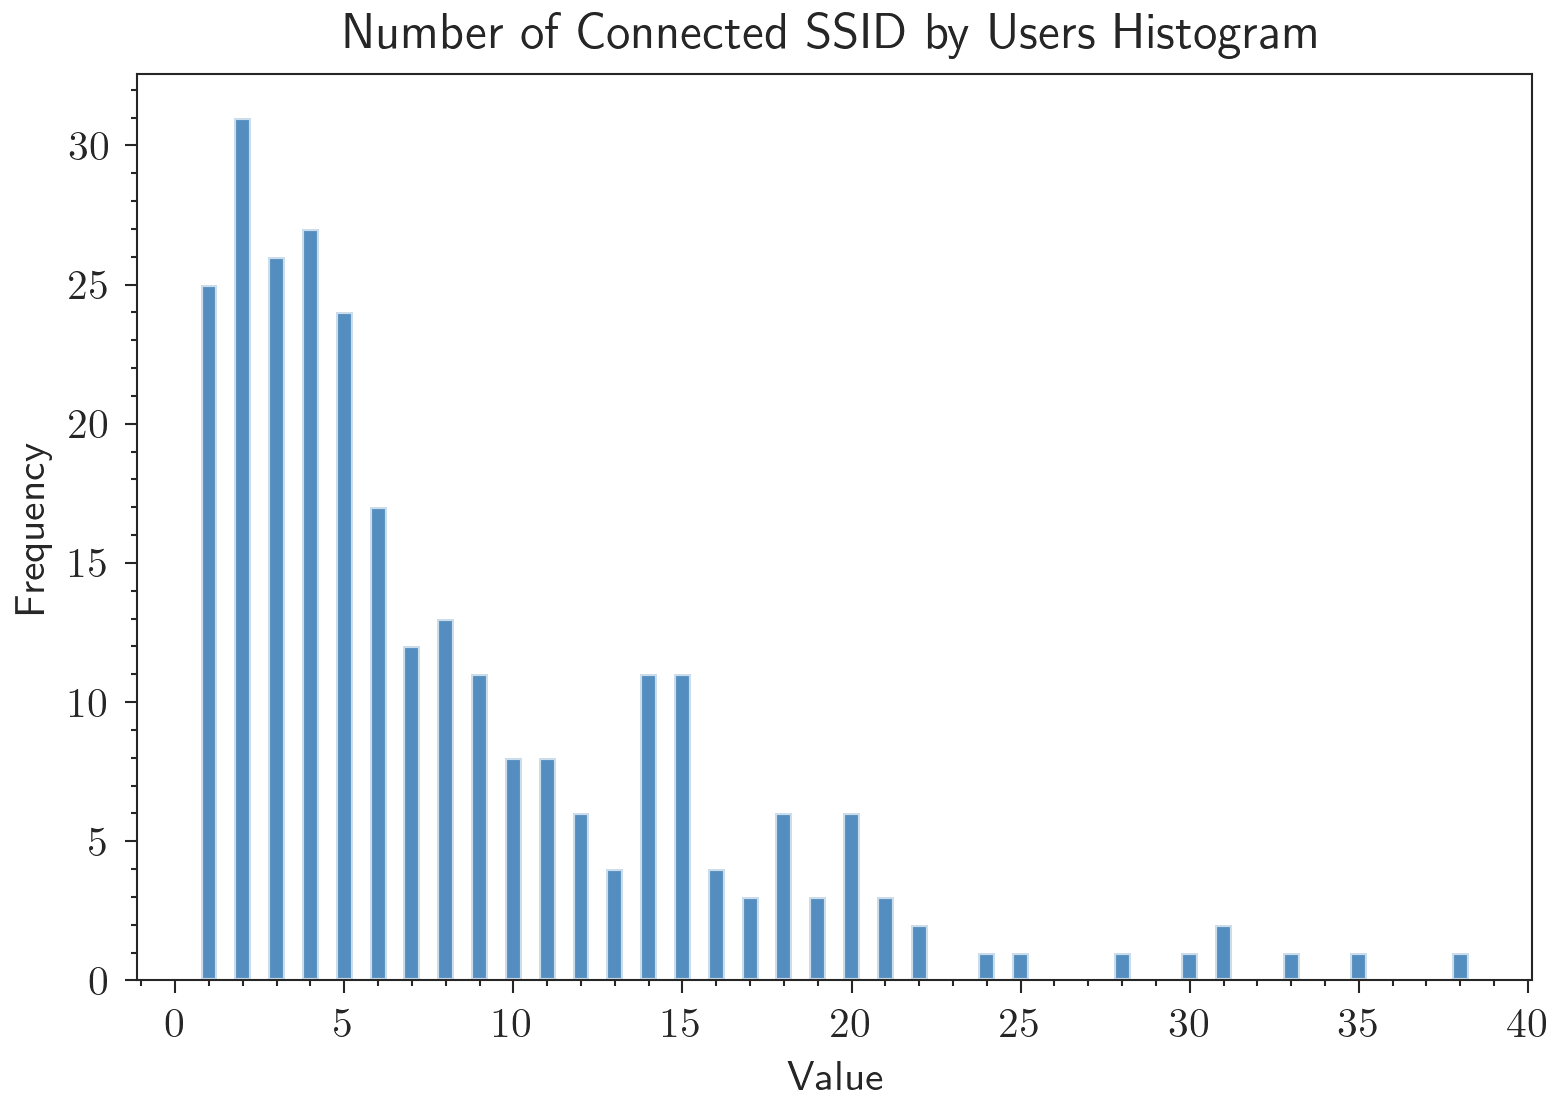

In [7]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(
    user_dist,
    bins=range(min(user_dist),
               max(user_dist) + 1, 1),
    # cumulative=True,
    alpha=0.7,
    rwidth=0.5,
    align='left'
)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of Connected SSID by Users Histogram')
plt.show()

25 users connected to 1 SSID only, and at maximum 1 user connected to 38 unique  
SSIDs. Using cumulative plotting, we can see that considering users connecting  
to 1 to 5 SSID would add up to about 130 users which is half of 270 users.

Now the question is, if we consider top 2 or 3 connected SSID of each user then  
how many important SSID would we have at the end ?


In [24]:
# Number of important SSID extracted from each user
max_ssid = 3
imp_ssids = []
imp_ssids_users = {}

for idx, row in enumerate(M):

    row = row.astype(int)
    # Get number of non-zero elements i.e. SSIDs that each user connected to
    connected_ssids = np.where(row > 0)[0]

    if len(connected_ssids) == 1:
        imp_ssids.append(connected_ssids[0])
        if connected_ssids[0] not in imp_ssids_users:
            imp_ssids_users[connected_ssids[0]] = [idx]
        else:
            imp_ssids_users[connected_ssids[0]].append(idx)
        print('node', idx, 'only has connected to one ssid', *connected_ssids)

    if len(connected_ssids) > 1:
        row_sort_idx = np.argsort(row)
        for ssid in row_sort_idx[::-1][:max_ssid]:
            imp_ssids.append(ssid)
            if ssid not in imp_ssids_users:
                imp_ssids_users[ssid] = [idx]
            else:
                imp_ssids_users[ssid].append(idx)
        # print(*row_sort_idx[::-1][:max_ssid], sep='\t')
        # print(*row[row_sort_idx][::-1][:max_ssid], sep='\t')

# Convert important SSID list to set in order to remove duplicates
imp_ssids = sorted(list(set(imp_ssids)))

# Save selected SSIDs
# file_path = f'/home/ali/Projects/Network/data/phonelab/data/sp_selected_{max_ssid}/selected_ssid.csv'
# np.savetxt(file_path, imp_ssids, delimiter=',', fmt='%s')

node 14 only has connected to one ssid 51
node 18 only has connected to one ssid 72
node 19 only has connected to one ssid 51
node 31 only has connected to one ssid 1
node 32 only has connected to one ssid 51
node 43 only has connected to one ssid 1
node 47 only has connected to one ssid 1
node 54 only has connected to one ssid 266
node 58 only has connected to one ssid 293
node 83 only has connected to one ssid 407
node 89 only has connected to one ssid 85
node 94 only has connected to one ssid 1
node 130 only has connected to one ssid 645
node 140 only has connected to one ssid 691
node 165 only has connected to one ssid 1
node 181 only has connected to one ssid 1
node 197 only has connected to one ssid 722
node 198 only has connected to one ssid 1
node 234 only has connected to one ssid 1
node 238 only has connected to one ssid 1
node 250 only has connected to one ssid 1
node 260 only has connected to one ssid 1
node 264 only has connected to one ssid 51
node 266 only has connected 

Interestingly, many of these nodes (exactly 12) connected to SSID = 1 which we  
think is the main university Wi-Fi network's SSID and then 4 of users connected  
to SSID = 4 which we don't know what it is, but the rest only has been connected  
by 1 user only.


In [25]:
print(len(imp_ssids))
print(imp_ssids)

366
[0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 13, 16, 20, 23, 35, 37, 42, 43, 44, 46, 47, 48, 51, 52, 57, 62, 70, 72, 75, 76, 77, 78, 79, 84, 85, 87, 100, 101, 102, 103, 106, 107, 108, 111, 112, 113, 114, 115, 117, 118, 119, 120, 123, 124, 126, 128, 129, 130, 131, 133, 134, 137, 139, 141, 145, 146, 147, 148, 149, 152, 154, 155, 156, 157, 158, 160, 162, 166, 167, 168, 171, 179, 181, 182, 183, 192, 193, 194, 202, 203, 205, 206, 209, 211, 212, 213, 216, 219, 220, 224, 228, 230, 232, 234, 235, 236, 241, 242, 243, 244, 245, 246, 248, 249, 250, 257, 258, 262, 266, 267, 269, 271, 277, 278, 284, 293, 296, 297, 299, 305, 310, 313, 316, 322, 323, 324, 326, 328, 329, 330, 331, 332, 336, 337, 340, 348, 353, 354, 355, 357, 358, 359, 363, 365, 368, 369, 378, 380, 381, 382, 383, 384, 385, 387, 388, 389, 390, 391, 394, 395, 396, 399, 402, 403, 404, 407, 419, 422, 423, 424, 429, 430, 431, 432, 436, 437, 438, 447, 465, 468, 469, 470, 474, 475, 484, 485, 486, 488, 491, 492, 498, 499, 503, 505, 506, 507, 508, 519, 

If we use 2 top connected SSIDs for each user we end up with 253 SSIDs at the  
end, but if we use 3 top SSIDs we end up with 366 unique SSID. The distribution  
if how many users connected to each SSID is analyzed be below ...


In [26]:
num_users_per_ssid = []
num_users_ssid = {}
for ssid in imp_ssids_users:
    # print(f'{ssid}:')
    # print(f'\t{len(imp_ssids_users[ssid])} users: {imp_ssids_users[ssid]}')
    num_users_per_ssid.append(len(imp_ssids_users[ssid]))
    if len(imp_ssids_users[ssid]) > 3:
        num_users_ssid[ssid] = len(imp_ssids_users[ssid])
counter = Counter(num_users_per_ssid)
# print(counter)
# print(sorted(counter,key=counter.get, reverse=True))
print('Number of connection to SSID: frequency')
print(dict(counter.most_common()))
print('SSID: number of connections')
print(
    dict(
        sorted(num_users_ssid.items(), key=lambda item: item[1], reverse=True)
    )
)


Number of connection to SSID: frequency
{1: 296, 2: 45, 3: 10, 4: 5, 17: 2, 186: 1, 8: 1, 26: 1, 41: 1, 11: 1, 5: 1, 7: 1, 6: 1}
SSID: number of connections
{1: 186, 43: 41, 1175: 26, 72: 17, 85: 17, 51: 11, 8: 8, 115: 7, 44: 6, 147: 5, 7: 4, 78: 4, 23: 4, 133: 4, 468: 4}


210 (out of 253) SSID were only connected by 1 user. At the highest we can see  
one SSID (id = 1) was connected by 170 users, then second and third most popular  
SSIDs are 43, and 51 with 25 and 8 connections.


In [27]:
ssid_dist = np.array(np.sum(M, axis=0, dtype=int).reshape(1, -1))[0]
print(len(np.where(ssid_dist == 0)[0]))
print(np.where(ssid_dist == 0)[0])

0
[]


User-Day -> SSID-Hour has 17,872 zero columns out of 28,224 or 63%, i.e., many    
columns are zero and thus PCA could compact information nicely.    

User-Day -> (253)Selected-SSID-Hour has 3,669 zero columns out of 6,072 or 60%    
which is fairly similar to un-selected SSID case.

In [28]:
print(ssid_dist[:10])
print(list(enumerate(ssid_dist))[:10])

[  95 9013    2  127    5   46    1  103  366   26]
[(0, 95), (1, 9013), (2, 2), (3, 127), (4, 5), (5, 46), (6, 1), (7, 103), (8, 366), (9, 26)]


Checking the number of time the firs 10 SSIDs {1,...,10} were connected by users

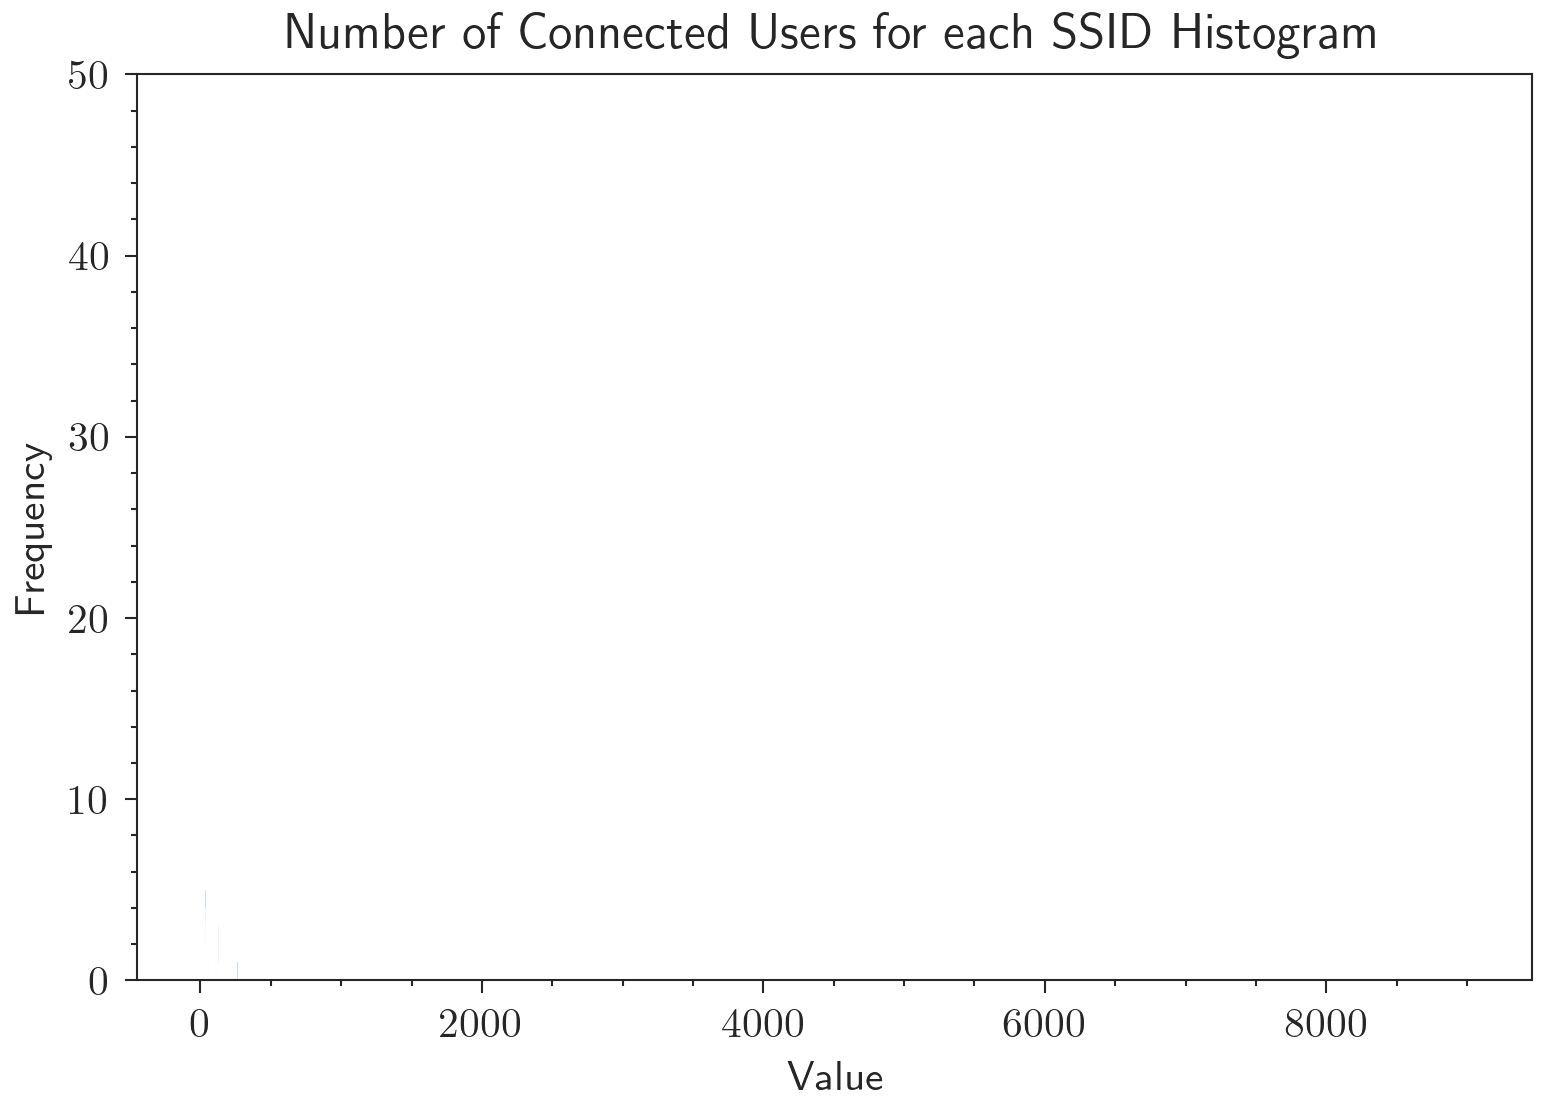

In [26]:
plt.close('all')
fig, ax = plt.subplots(figsize=(6, 4))
ax.hist(
    ssid_dist,
    bins=range(min(ssid_dist),
               max(ssid_dist) + 1, 1),
    # cumulative=True,
    alpha=0.7,
    rwidth=0.5,
    align='left'
)
ax.set_ylim((0, 50))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Number of Connected Users for each SSID Histogram')
plt.show()

Next we sort the SSIDs based on how many time they have been connected to    
in general (any user could visited same location more than once)

In [29]:
ssid_dist_tuple = sorted(
    list(enumerate(ssid_dist)), key=lambda e: e[1], reverse=True
)
print(ssid_dist_tuple[:10])
print('SSIDs sorted based on number of users conncting them:')
print(list(zip(*ssid_dist_tuple[:len(imp_ssids)]))[0])

[(1, 9013), (43, 1463), (72, 992), (85, 737), (8, 366), (133, 293), (51, 263), (115, 255), (242, 241), (44, 226)]
SSIDs sorted based on number of users conncting them:
(1, 43, 72, 85, 8, 133, 51, 115, 242, 44, 23, 129, 468, 62, 194, 211, 168, 607, 232, 57, 130, 369, 171, 503, 235, 469, 550, 991, 1046, 103, 220, 722, 3, 79, 192, 224, 506, 692, 743, 721, 1087, 152, 888, 267, 669, 166, 640, 975, 1136, 785, 348, 983, 507, 579, 933, 754, 832, 313, 447, 898, 87, 271, 357, 806, 809, 1053, 499, 1095, 630, 905, 134, 547, 553, 626, 205, 7, 297, 1036, 117, 964, 156, 566, 918, 78, 859, 1105, 850, 154, 968, 485, 492, 1071, 0, 549, 249, 179, 523, 585, 328, 508, 363, 75, 629, 904, 100, 391, 432, 436, 691, 851, 310, 668, 296, 336, 365, 236, 258, 305, 688, 816, 909, 131, 245, 262, 332, 390, 123, 747, 322, 596, 20, 552, 13, 269, 146, 368, 795, 324, 230, 519, 484, 158, 381, 1138, 431, 597, 714, 802, 244, 712, 719, 976, 212, 323, 364, 404, 822, 1028, 16, 102, 330, 474, 901, 5, 624, 119, 52, 257, 316, 679,

We can see that 108 SSIDs are common between important SSID from top connected    
2 SSIDs for each user (with the total size of 253) and top connected SSIDs based    
on total number of connections by users. In other words, 42% or near half of    
important SSIDs are chosen from high connected SSIDs and the other half is based    
on SSIDs and only 1 (or 2) user(s) would usually interact.

If we change the top 2 SSIDs to top 3, we increase the number of important SSIDs    
to 366 from 254 (112 more SSIDs or 48% increase) but the ratio of intersection    
between two set is still about the same number (exactly at 49% with 180 SSIDs).

When we move up to top 5 SSIDs, the intersection is 250 out of 470 or 53% which    
is higher than before, but our important SSID set is almost half the size of all    
SSIDs in dataset, but the ratio is still about the half.

One can conclude that if we no mater the size of top connected SSIDs from each    
user, usually about half of those would be important to all users as well, and    
the other half would be more important to that specific user mostly.

In [38]:
imp_ssid_inter = set(imp_ssids).intersection(
    list(zip(*ssid_dist_tuple[:len(imp_ssids)]))[0]
)
print(len(imp_ssid_inter))
print(len(imp_ssids))
print(f'{len(imp_ssid_inter)/len(imp_ssids)}')
print(sorted(list(imp_ssid_inter)))

282
366
0.7704918032786885
[0, 1, 3, 5, 7, 8, 9, 10, 13, 16, 20, 23, 43, 44, 46, 47, 48, 51, 52, 57, 62, 72, 75, 77, 78, 79, 84, 85, 87, 100, 101, 102, 103, 111, 114, 115, 117, 119, 123, 124, 126, 128, 129, 130, 131, 133, 134, 141, 145, 146, 147, 148, 149, 152, 154, 155, 156, 157, 158, 160, 162, 166, 167, 168, 171, 179, 183, 192, 193, 194, 205, 206, 209, 211, 212, 213, 216, 220, 224, 230, 232, 235, 236, 241, 242, 243, 244, 245, 246, 248, 249, 250, 257, 258, 262, 266, 267, 269, 271, 277, 278, 284, 296, 297, 305, 310, 313, 316, 322, 323, 324, 326, 328, 330, 331, 332, 336, 348, 357, 358, 359, 363, 365, 368, 369, 378, 381, 384, 388, 390, 391, 403, 404, 419, 424, 429, 430, 431, 432, 436, 447, 465, 468, 469, 474, 475, 484, 485, 486, 488, 491, 492, 498, 499, 503, 505, 506, 507, 508, 519, 520, 523, 527, 530, 547, 549, 550, 552, 553, 558, 566, 569, 579, 582, 585, 591, 594, 596, 597, 600, 602, 607, 608, 618, 624, 626, 629, 630, 631, 639, 640, 667, 668, 669, 679, 680, 688, 691, 692, 704, 708, 712

In [39]:
file_path = f'/home/ali/Projects/Network/data/phonelab/data/sp_selected_1/selected_ssid.csv'
np.savetxt(file_path, sorted(list(imp_ssid_inter)), delimiter=',', fmt='%s')

## User @ Day labels


In [ ]:
labels = pd.read_csv(
    # '/home/ali/Projects/Network/data/phonelab/data/user_day_ssid_connect_label.csv',
    '/home/ali/Projects/Network/data/phonelab/data/user_day_location_connect_label.csv',
    index_col=False,
    header=None,
    names=['label']
).astype(int).values
labels.shape

In [ ]:
print(len(np.unique(labels)))
print(np.unique(labels))

## Normalize the matrix (Min-Max)


In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
min_max_scaler = MaxAbsScaler()
M_scaled = min_max_scaler.fit_transform(M)

In [ ]:
# min_max_scaler = MaxAbsScaler()
# sM_scaled = min_max_scaler.fit_transform(sM)

We have 19,144 rows of data and 1176 SSID or location or 1,176 x 24 = 28,224 (SSID x Hour) spatio-temporal features.


## Standardize the matrix


In [ ]:
# from sklearn.preprocessing import StandardScaler

In [ ]:
# standard_scaler = StandardScaler()
# M_scaled= standard_scaler.fit_transform(M)

## Compute covariance matrix

Due to high computation, is executed on CC


In [ ]:
# cov_mat = np.cov(M_scaled.T)
# eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

## Load eigen vectors and eigen values


In [ ]:
# sE = sparse.load_npz('/home/ali/Projects/Network/data/phonelab/data/user_ssid_connect_eigen_vecs_sparse.npz')

# sE = sparse.load_npz('/home/ali/Projects/Network/data/phonelab/data/user_day_ssid_connect_eigen_vecs_sparse.npz')

# sE = sparse.load_npz('/home/ali/Projects/Network/data/phonelab/data/user_location_connect_eigen_vecs_sparse.npz')

# sE = sparse.load_npz('/home/ali/Projects/Network/data/phonelab/data/user_day_location_connect_eigen_vecs_sparse.npz')

# Selected SSID
# sE = sparse.load_npz('/home/ali/Projects/Network/data/phonelab/data/selected_2/user_day_ssid_connect_eigen_vecs.npz')

# E = sE.toarray()

# V = np.load('/home/ali/Projects/Network/data/phonelab/data/user_ssid_connect_eigen_vals.npy')

# V = np.load('/home/ali/Projects/Network/data/phonelab/data/user_day_ssid_connect_eigen_vals.npy')

# V = np.load('/home/ali/Projects/Network/data/phonelab/data/user_location_connect_eigen_vals.npy')

# V = np.load('/home/ali/Projects/Network/data/phonelab/data/user_day_location_connect_eigen_vals.npy')

# Selected SSID
V = np.load(
    '/home/ali/Projects/Network/data/phonelab/data/selected_2/user_day_ssid_connect_eigen_vals.npy'
)


## Variance ratio


Calculate accumulative variance ratio of eigen values


In [ ]:
tot = sum(V)
var_exp = np.array([(i / tot) for i in sorted(V, reverse=True)])
cum_var_exp = np.cumsum(var_exp).real

Look at the first 10 pricipal component variance ratio


In [ ]:
var_exp[:10].real

Look at the first 10 cumilative pricipal component variance ratio


In [ ]:
cum_var_exp[:10]

Find the number of needed components to represent 5,10,15, ... 100 % of data


In [ ]:
split_at = cum_var_exp.searchsorted(np.linspace(0, 1, 20, endpoint=False))
split_at

In [ ]:
split_var = [
    '{:.0f}'.format(x * 100)
    for x in np.linspace(0, 1, 20, endpoint=False)[20 - len(set(split_at)):]
]
cps = [x + 1 for x in sorted(list(set(split_at)))]
cp_var = list(zip(split_var, cps))
cp_var

Number of components -> ratio


In [ ]:
print(
    f'80 % of data can be captured using {split_at[-4] + 1} number of components or {np.round((split_at[-4] + 1) / len(V) * 100, 2)} % of features.'
)


Exclude repeated ones because they are give us same number of components


In [ ]:
split_at[1:]
# split_at[2:]
# split_at[3:]

Check the variance ration at the identified component numbers  
Note they should be increasing within 5% ratio ...


In [ ]:
cum_var_exp[split_at][1:]
# cum_var_exp[split_at][2:]
# cum_var_exp[split_at][3:]

## Visualize variance ratio


In [ ]:
plt.figure(figsize=(16, 12), dpi=400)
plt.bar(
    # range(1, len(V) + 1),
    # var_exp.real,
    range(1, 251),
    var_exp[:250].real,
    alpha=0.5,
    align='center',
    label='Explained Variance'
)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Component')
plt.legend(loc='best')
PATH = os.path.join(DATA, 'pca_variance_ratio.pdf')
# plt.savefig(PATH, dpi=400)
plt.ylim((0, 0.055))
plt.title('Variance Ratio')
plt.show()

In [ ]:
plt.figure(figsize=(4, 3), dpi=400)
plt.step(
    range(1,
          len(V) + 1),
    cum_var_exp.real,
    # range(1, 1051),
    # cum_var_exp[0:1050].real,
    where='mid',
    label='Cumulative Explained Variance'
)
# plt.plot(cum_var_exp)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Component')
plt.legend(loc='best')
PATH = os.path.join(DATA, 'pca_variance_ratio.pdf')
# plt.savefig(PATH, dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(4, 3), dpi=400)
plt.bar(
    range(1, 251),
    var_exp[:250].real,
    alpha=0.5,
    align='center',
    label='Explained Variance'
)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Component')
plt.legend(loc='best')
PATH = os.path.join(DATA, 'pca_variance_ratio.pdf')
# plt.savefig(PATH, dpi=400)
plt.show()

In [ ]:
plt.figure(figsize=(4, 3), dpi=400)
plt.step(
    range(1, 251),
    cum_var_exp[0:250].real,
    where='mid',
    label='Cumulative Explained Variance'
)
# plt.plot(cum_var_exp)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Principal Component')
plt.legend(loc='best')
PATH = os.path.join(DATA, 'pca_variance_ratio.pdf')
# plt.savefig(PATH, dpi=400)
plt.show()

## Sort eigen vectors and eigen values


In [ ]:
eigen_pairs = [(np.abs(V[i]), E[:, i]) for i in range(len(V))]
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

In [ ]:
# idx = eigen_vals.argsort()[::-1]
# eigen_vals = eigen_vals[idx]
# eigen_vecs = eigen_vecs[:,idx]
# eigen_pairs = (eigen_vals, eigen_vecs)

In [ ]:
component_number = 250
W = np.concatenate(
    [eigen_pairs[i][1][:, np.newaxis] for i in range(component_number)],
    axis=1
)

In [ ]:
W.shape

In [ ]:
# M_new = np.dot(M_minmax, W)
M_new = M_minmax @ W

# file_name = f'/home/ali/Projects/Network/data/phonelab/data/user_ssid_connect_transformed_{component_number}.npy'
# np.save(file_name, M_new)

In [ ]:
M_new.shape

In [ ]:
PATH = '/home/ali/Projects/Network/data/phonelab/data/user_day_ssid_connect_label.csv'
M_labels = pd.read_csv(PATH, index_col=False, header=None,
                       names=['label']).iloc[:, 0]
# y = pd.read_csv(PATH, index_col=False, header=None, names=['label']).astype(int).values

Calculate the distribution of classes


In [ ]:
M_labels.value_counts().plot(kind='bar', figsize=(32, 6), rot=90)
# plt.xticks(rotation=90)
# Remoce odd X ticks
ax = plt.gca()
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
plt.xlabel('Label (i.e. User)', labelpad=10)
plt.ylabel('Number of Instance (i.e. Days of Having Data)', labelpad=10)
plt.title('Dataset Label Frequency', pad=10)


In [ ]:
my_cmap = clr.LinearSegmentedColormap.from_list(
    'my_cmap', [
        (0, 'skyblue'), (0.25, 'aqua'), (0.5, 'royalblue'), (0.75, 'darkblue'),
        (1, 'black')
    ],
    N=len(M_labels.unique())
)


In [ ]:
my_cmap = sns.color_palette(
    'rocket', n_colors=len(M_labels.unique()), as_cmap=True
)


In [ ]:
def discrete_cmap(N, base_cmap=None):
    '''Create an N-bin discrete colormap from the specified input map'''

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

In [ ]:
N = len(M_labels.unique())
plt.scatter(
    M_new[:, 0],
    M_new[:, 1],
    c=M_labels,
    edgecolor='none',
    alpha=0.5,
    s=10,
    # cmap=plt.cm.get_cmap('spectral', 10) # Only if we have 10 classes
    # cmap=plt.cm.get_cmap('viridis')
    cmap=discrete_cmap(N, 'cubehelix')
    # cmap = my_cmap
)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
# plt.colorbar()
cbar = plt.colorbar(ticks=range(0, N, 10))
cbar.ax.tick_params(labelsize=6)

In [ ]:
df = pd.DataFrame(
    np.concatenate((M_new.real, M_labels[:, np.newaxis]), axis=1),
    columns=['cp1', 'cp2', 'label']
)


# Clustering on Dataset After PCA


Let's create dataframe from transformed data after PCA


In [ ]:
df = pd.DataFrame(
    data=M.real, columns=['pc' + str(i) for i in range(M.shape[1])]
)
df['target'] = labels

In [ ]:
df.head()

A few of classes (i.e. labels) has only 1 instance which could affect the prediction. So we can (optionally) remove these to improve the classification


In [ ]:
M_labels_counts = df['target'].value_counts()
print(M_labels_counts[M_labels_counts < 2].index)

df.drop(
    df[df['target'].isin(M_labels_counts[M_labels_counts < 2].index)].index,
    inplace=True
)

# M_labels_counts = df['target'].value_counts()
# print(M_labels_counts[M_labels_counts < 2].index)

Split dataset into training and test sets (while considering distribution of classes)


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(
    df, test_size=0.2, random_state=1, stratify=df['target']
)

# print(train_set['target'].value_counts() / len(train_set))
# print(test_set['target'].value_counts() / len(test_set))

Another way of dataset split


In [ ]:
# from sklearn.model_selection import StratifiedShuffleSplit

# strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1)
# for train_index, test_index in strat_split.split(df, df['target']):
#     train_set = df.iloc[train_index]
#     test_set = df.iloc[test_index]

# print(train_set['target'].value_counts() / len(train_set))
# print(test_set['target'].value_counts() / len(test_set))

print(df.shape)


In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
X_train = train_set.iloc[:, :-1]
y_train = train_set.iloc[:, -1]
X_test = test_set.iloc[:, :-1]
y_test = test_set.iloc[:, -1]

In [ ]:
x_train.head()

In [ ]:
print(x_test.iloc[0].values.reshape(1, -1))
print(y_test.iloc[0])

## SVM


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
grid_parameters = [
    {
        'kernel': ['linear'],
        'C': [1]
    }, {
        'kernel': ['rbf'],
        'C': [1000],
        'gamma': [0.1]
    }
]
gs = GridSearchCV(
    SVC(),
    param_grid=grid_parameters,
    scoring='precision_macro',
    cv=5,
    n_jobs=-1
)
gs.fit(X_train, y_train)
y_pred = gs.predict(X_test)


In [ ]:
report = pd.DataFrame(classification_report(y_test, y_pred,
                                            output_dict=True)).transpose()

In [ ]:
print(report)
# report.loc['micro avg', 'precision':'f1-score']
report.loc['macro avg', ['precision', 'recall', 'f1-score']]


In [ ]:
sc = [cp_var[cp], cp]
sc.extend(report.loc['micro avg', 'precision':'f1-score'])
sc.append(gs.refit_time_)
scores.append(sc)

In [ ]:
svm_clf = SVC(gamma='auto', random_state=42)
svm_clf.fit(x_train, y_train)

In [ ]:
svm_clf.predict(x_test.iloc[0].values.reshape(1, -1))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier = RandomForestClassifier(max_depth=20, random_state=0)
classifier.fit(x_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

In [ ]:
N = len(M_labels.unique())
base = plt.cm.get_cmap('cubehelix')
color_list = base(np.linspace(0, 1, N))
# print(color_list)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, svd_solver='randomized')

# M_new = pca.fit_transform(M)
M_new = pca.fit_transform(M_minmax)

print(pca.components_.shape)
print(pca.explained_variance_ratio_)

In [ ]:
target = np.arange(0, M_new.shape[0])
plt.scatter(
    M_new[:, 0],
    M_new[:, 1],
    c=target,
    edgecolor='none',
    alpha=0.5,
    # cmap=plt.cm.get_cmap('spectral', 10) # Only if we have 10 classes
    cmap=plt.cm.get_cmap('viridis')
)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()

In [ ]:
principalDf = pd.DataFrame(data=M_new, columns=['pc1', 'pc2'])


In [ ]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA')
# ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(principalDf['pc1'], principalDf['pc2'], s=1)
# ax.grid()

In [ ]:
pca = PCA().fit(M_minmax.T)

In [ ]:
pca.explained_variance_ratio_.shape

In [ ]:
pca_com = []
pca_var = []
for dim in np.arange(1, M_minmax.shape[0]):
    if dim <= M_minmax.shape[0]:
        svd_solver = 'full'
    else:
        svd_solver = 'randomized'
    pca = PCA(n_components=dim, svd_solver=svd_solver).fit(M_minmax)
    pca_com.append(dim)
    pca_var.append(sum(pca.explained_variance_ratio_))
plt.plot(pca_com, pca_var)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
pca = PCA().fit(M_minmax)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')